### PCA

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import plotly.express as px

In [165]:
df = pd.read_csv("/Users/asheshlalshrestha/Desktop/UB/Research/Hospital prediction/CarePathways-main/Models/Datasets/preprocessed_dataset.csv")

In [166]:
df = df.drop("Unnamed: 0",axis=1)

In [167]:
df

,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),Diabetes,...,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil,hospital_length_of_stay
0,0.485152,1,0.003233,0.001623,0.0,0,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21
1,-0.308119,0,-1.497964,-0.362476,0.0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,-0.491182,0,0.003233,0.001623,0.0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
3,1.705571,1,1.989114,-0.766671,0.0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
4,1.522508,1,0.003233,0.001623,1.0,0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.119027,0,-0.360602,-0.171303,0.0,1,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
502,-0.613224,0,-0.235617,-0.417097,0.0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13
503,0.485152,0,0.003233,-1.378426,0.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19
504,0.912299,1,-1.110511,-0.832216,0.0,1,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


### Splitting X and y

In [168]:
from sklearn.model_selection import train_test_split
X = df.drop("hospital_length_of_stay",axis =1)
y = df['hospital_length_of_stay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (354, 745)
X_test shape: (152, 745)
y_train shape: (354,)
y_test shape: (152,)


### Implenting lasso regression to the original dataset

In [169]:
from sklearn.linear_model import Lasso

# Apply Lasso Regression
lasso = Lasso(alpha=0.1)  # Specify the regularization parameter alpha
lasso.fit(X_train, y_train)

# Make predictions
y_pred = lasso.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 176.3511644220652


### Applying PCA to reduce to a certain dimension capturing 80 percent variance

In [170]:
pca = PCA(n_components = 80)
# Transform data
pca_trans = pca.fit_transform(X)     
print(pca_trans)                                                  
print(pca_trans.shape) 

[[-0.46285071 -0.80303111  0.24250365 ... -0.13712022 -0.00572361
   0.3373084 ]
 [-0.9975716   1.1140011   0.58913239 ... -0.00206211 -0.14404004
  -0.04527687]
 [ 0.22524502  0.47810389 -0.08194292 ... -0.03423155  0.00237681
   0.03962781]
 ...
 [-1.03783024  0.30983398 -1.04257951 ...  0.14820322  0.20558615
  -0.35055458]
 [-1.63111708  0.02813337  0.0998959  ...  0.07954721 -0.11065731
  -0.16348336]
 [-0.18036953 -0.36818808  0.12110351 ...  0.08684669 -0.44488044
   0.21553678]]
(506, 80)


Total variance captured: 0.8104598796559431


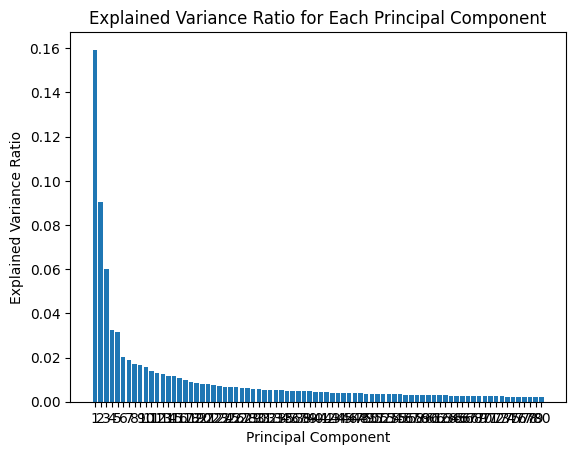

In [171]:
# Get the explained variance ratios for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

# Print the explained variance ratios for each component
# print("Explained Variance Ratios for each component:")
# for i, var_ratio in enumerate(explained_variance_ratios):
#     print(f"Component {i+1}: {var_ratio}")
print("Total variance captured:",sum(explained_variance_ratios))
# Plotting the explained variance ratios
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, align='center')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

#### Applying lasso to the 80 percent variance captured pca components

In [172]:
# Apply Lasso Regression to the 80 variance captured pca components
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)

lasso = Lasso(alpha=0.1)  # Specify the regularization parameter alpha
lasso.fit(X_train, y_train)

# Make predictions
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error for training:", mse_train)
print("Mean Squared Error for testing:", mse_test)

Mean Squared Error for training: 113.43747827442814
Mean Squared Error for testing: 176.7316408907595


In [173]:
df_train = pd.DataFrame({'y_train': y_train, 'y_pred_train': y_pred_train})

# Create a scatter plot using Plotly Express
fig = px.scatter(df_train, x='y_train', y='y_pred_train', title='y_train vs y_pred_train')
fig.update_layout(xaxis_title='y_train', yaxis_title='y_pred_train')
fig.show()

df_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_test})

# Create a scatter plot using Plotly Express
fig = px.scatter(df_test, x='y_test', y='y_pred_test', color_discrete_sequence=['green'], title='y_test vs y_pred_test')
fig.update_layout(xaxis_title='y_test', yaxis_title='y_pred_test')
fig.show()

### Applying PCA to reduce to a certain dimension capturing 85 percent variance

In [174]:
pca = PCA(n_components = 105)
# Transform data
pca_trans = pca.fit_transform(X)     
print(pca_trans)                                                  
print(pca_trans.shape) 

[[-0.46285071 -0.80303111  0.24250358 ...  0.17246793  0.22236664
   0.16170498]
 [-0.9975716   1.1140011   0.5891324  ... -0.06205886  0.1183537
  -0.08828504]
 [ 0.22524502  0.47810389 -0.08194291 ... -0.01081949  0.01686081
   0.02437757]
 ...
 [-1.03783024  0.30983397 -1.04257954 ...  0.05692957  0.02593434
  -0.25678332]
 [-1.63111708  0.02813336  0.0998959  ... -0.07370686  0.06647789
   0.02230647]
 [-0.18036953 -0.36818808  0.12110349 ...  0.22385591  0.14756844
   0.0488578 ]]
(506, 105)


Total variance captured: 0.8579112437679746


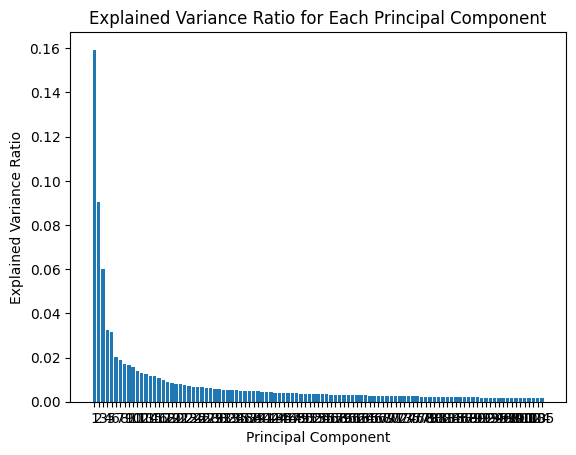

In [175]:
# Get the explained variance ratios for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

print("Total variance captured:",sum(explained_variance_ratios))
# Plotting the explained variance ratios
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, align='center')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

#### Applying lasso to the 85 percent variance captured pca components

In [176]:
# Apply Lasso Regression to the 80 variance captured pca components
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)

lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)

# Make predictions
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error for training:", mse_train)
print("Mean Squared Error for testing:", mse_test)

Mean Squared Error for training: 110.509238038359
Mean Squared Error for testing: 175.94147441787882


In [177]:
df_train = pd.DataFrame({'y_train': y_train, 'y_pred_train': y_pred_train})

# Create a scatter plot using Plotly Express
fig = px.scatter(df_train, x='y_train', y='y_pred_train', title='y_train vs y_pred_train')
fig.update_layout(xaxis_title='y_train', yaxis_title='y_pred_train')
fig.show()

df_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_test})

# Create a scatter plot using Plotly Express
fig = px.scatter(df_test, x='y_test', y='y_pred_test', color_discrete_sequence=['green'], title='y_test vs y_pred_test')
fig.update_layout(xaxis_title='y_test', yaxis_title='y_pred_test')
fig.show()

### Applying PCA to reduce to a certain dimension capturing 90 percent variance

In [178]:
pca = PCA(n_components = 140)
# Transform data
pca_trans = pca.fit_transform(X)     
print(pca_trans)                                                  
print(pca_trans.shape) 

[[-0.46285071 -0.80303111  0.24250358 ...  0.06769509  0.05284686
  -0.18626179]
 [-0.9975716   1.1140011   0.5891324  ... -0.00359666  0.12053252
  -0.1588557 ]
 [ 0.22524502  0.47810389 -0.08194291 ... -0.00347433  0.00887474
  -0.0189117 ]
 ...
 [-1.03783024  0.30983397 -1.04257954 ...  0.06034273 -0.00492269
  -0.05228832]
 [-1.63111708  0.02813336  0.09989589 ...  0.08665021 -0.03273394
   0.02357102]
 [-0.18036953 -0.36818808  0.12110349 ... -0.01174863  0.15075363
   0.01193948]]
(506, 140)


Total variance captured: 0.9038469961300765


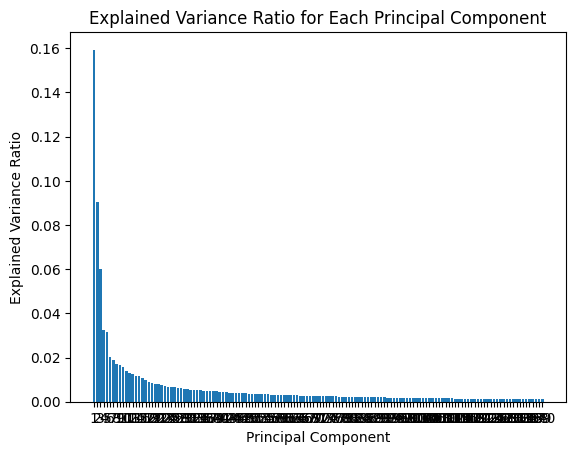

In [179]:
# Get the explained variance ratios for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

print("Total variance captured:",sum(explained_variance_ratios))
# Plotting the explained variance ratios
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, align='center')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

#### Applying lasso to the 85 percent variance captured pca components

In [180]:
# Apply Lasso Regression to the 80 variance captured pca components
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)

lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)

# Make predictions
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error for training:", mse_train)
print("Mean Squared Error for testing:", mse_test)

Mean Squared Error for training: 106.83501460014685
Mean Squared Error for testing: 177.86817100344763


In [181]:
df_train = pd.DataFrame({'y_train': y_train, 'y_pred_train': y_pred_train})

# Create a scatter plot using Plotly Express
fig = px.scatter(df_train, x='y_train', y='y_pred_train', title='y_train vs y_pred_train')
fig.update_layout(xaxis_title='y_train', yaxis_title='y_pred_train')
fig.show()

df_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_test})

# Create a scatter plot using Plotly Express
fig = px.scatter(df_test, x='y_test', y='y_pred_test', color_discrete_sequence=['green'], title='y_test vs y_pred_test')
fig.update_layout(xaxis_title='y_test', yaxis_title='y_pred_test')
fig.show()